# **1. In-place Quick Sort**

In [30]:
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline
import unittest
import numpy as np
import pandas as pd



In [2]:
Total_execution = [0,0,0,0,0,0]
Compare = [0,0,0,0,0,0]
swap = [0,0,0,0,0,0]

In [65]:
comparisons = 0
swaps = 0
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        comparisons += 1  # Increment comparison count
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
            swaps += 1  # Increment swap count
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    swaps += 1  # Increment swap count
    
    return i + 1



In [4]:
def quick_sort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort(arr, low, pivot_index - 1)
        quick_sort(arr, pivot_index + 1, high)



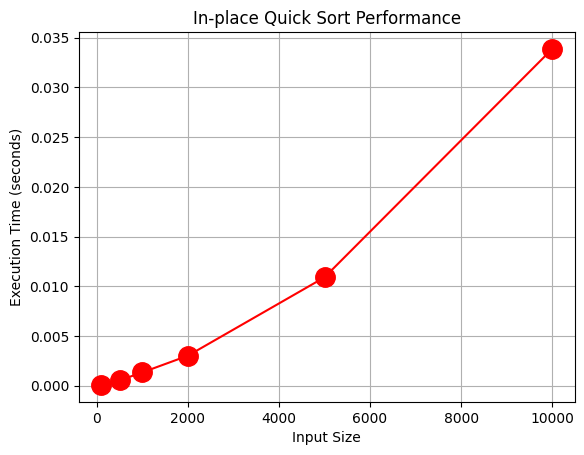

In [5]:
def qs_analyze_time(input_sizes):
    execution_times = []
    comparisons = []
    swaps = []
    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        quick_sort(arr, 0, len(arr) - 1)
        
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
    Total_execution[0]=execution_times
    return execution_times
    
input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = qs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort Performance')
plt.grid(True)
plt.show()

# **2. Merge Sort**

In [6]:
def mergesort(arr,low,high):
    if low<high:
        mid = (low+high)//2
        mergesort(arr,low,mid)
        mergesort(arr,mid+1,high)
        merge(arr,low,mid,high)


In [7]:
def merge(arr,low,mid,high):
    temp = list()
    left = low
    right = mid+1
    while(left<=mid and right<=high):
        if arr[left]<arr[right]:
            temp.append(arr[left])
            left+=1
        else:
            temp.append(arr[right])
            right+=1
    while(left<=mid):
        temp.append(arr[left])
        left+=1
    while(right<=high):
        temp.append(arr[right])
        right+=1
    for i in range(low,high+1):
        arr[i] = temp[i-low]




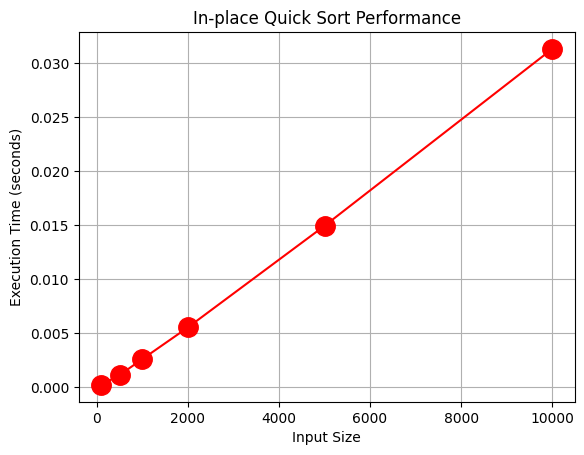

In [8]:
def ms_analyze_time(input_sizes):
    execution_times = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        mergesort(arr, 0, len(arr) - 1)
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
    Total_execution[1] = execution_times
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = ms_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort Performance')
plt.grid(True)
plt.show()

# **3. In-place Heap Sort**

In [9]:
class BinaryHeap:
    def __init__(self):
        self.heap = []

    def heapify(self, index, heap_size):
        largest = index
        left_child_index = 2 * index + 1
        right_child_index = 2 * index + 2

        if left_child_index < heap_size and self.heap[left_child_index] > self.heap[largest]:
            largest = left_child_index

        if right_child_index < heap_size and self.heap[right_child_index] > self.heap[largest]:
            largest = right_child_index

        if largest != index:
            self.heap[index], self.heap[largest] = self.heap[largest], self.heap[index]
            self.heapify(largest, heap_size)

    def insert(self, item):
        self.heap.append(item)
        index = len(self.heap) - 1
        while index > 0:
            parent_index = (index - 1) // 2
            if self.heap[index] <= self.heap[parent_index]:
                break
            self.heap[index], self.heap[parent_index] = self.heap[parent_index], self.heap[index]
            index = parent_index

    def remove_max(self):
        if not self.heap:
            return None

        if len(self.heap) == 1:
            return self.heap.pop()

        max_value = self.heap[0]
        self.heap[0] = self.heap.pop()
        self.heapify(0, len(self.heap))
        return max_value





In [10]:
def in_place_heap_sort(arr):
    n = len(arr)

    # Create a binary heap and insert the elements
    heap = BinaryHeap()
    for i in range(n):
        heap.insert(arr[i])

    # Remove the maximum element from the heap and place it at the end of the array
    for i in range(n - 1, -1, -1):
        arr[i] = heap.remove_max()


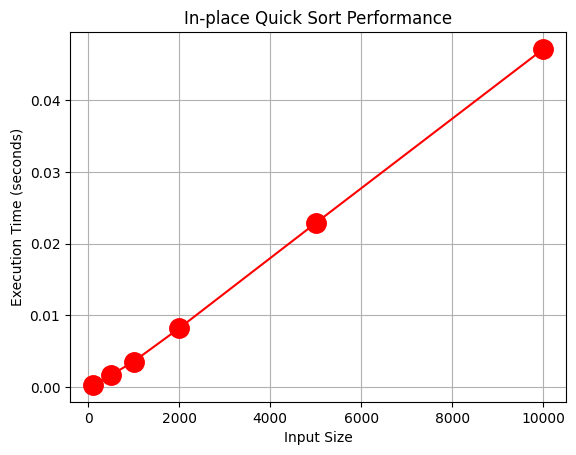

In [11]:
def hs_analyze_time(input_sizes):
    execution_times = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        in_place_heap_sort(arr)
        end_time = time.perf_counter()

        execution_times.append(end_time - start_time)
    Total_execution[2] = execution_times
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = hs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort Performance')
plt.grid(True)
plt.show()

 # **4. Insertion Sort**

In [12]:
def insertion_sort(a):
    n = len(a)
    for i in range(1,n):
        key = a[i]
        j = i-1
        while(a[j] > key and j>=0):
            a[j+1] = a[j]
        
            j -= 1
    
        a[j+1] = key
    

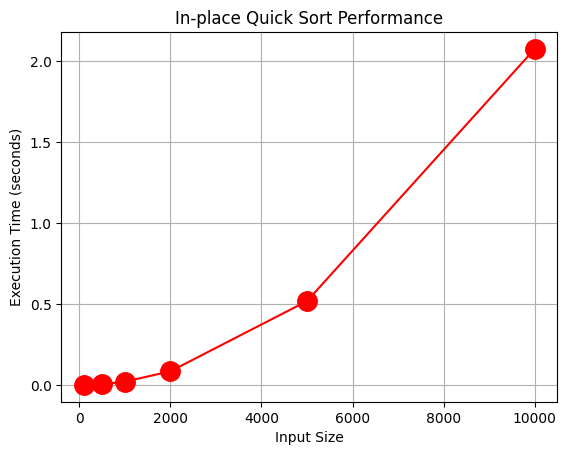

In [13]:
def is_analyze_time(input_sizes):
    execution_times = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.time()
        insertion_sort(arr)
        end_time = time.time()

        execution_times.append(end_time - start_time)
    Total_execution[3] = execution_times
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = is_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('In-place Quick Sort Performance')
plt.grid(True)
plt.show()

# **5. Bucket Sort**

In [14]:
def bucket_sort(arr):
    if len(arr) == 0:
        return arr

    # Find the maximum and minimum values in the input array
    max_val = max(arr)
    min_val = min(arr)

    # Determine the range for each bucket
    bucket_range = (max_val - min_val) / len(arr)

    # Create an empty list of buckets
    num_buckets = len(arr) + 1  # Increase the number of buckets by 1 to prevent out-of-range errors
    buckets = [[] for _ in range(num_buckets)]

    # Place each element in its corresponding bucket
    for num in arr:
        index_b = int((num - min_val) / bucket_range)
        buckets[index_b].append(num)

    # Sort each bucket and concatenate them to get the sorted output
    sorted_arr = []
    for bucket in buckets:
        bucket.sort()
        sorted_arr.extend(bucket)

    return sorted_arr




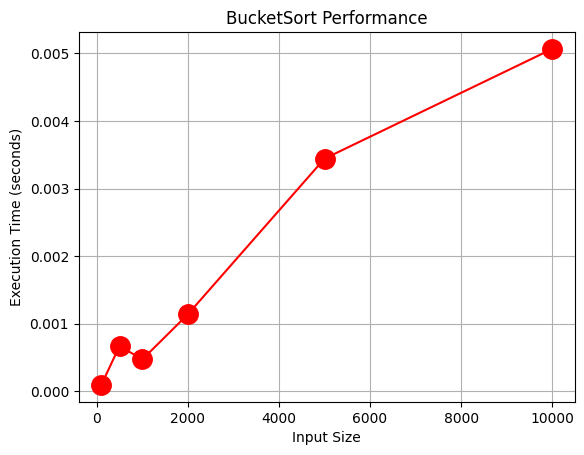

In [15]:
def bs_analyze_time(input_sizes):
    execution_times = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        bucket_sort(arr)
        end_time = time.perf_counter()

        
        execution_times.append(end_time - start_time)
    Total_execution[4] = execution_times
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = bs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('BucketSort Performance')
plt.grid(True)
plt.show()

 # **6. Radix Sort**

In [16]:
def counting_sort(arr, exp):
    n = len(arr)
    output = [0] * n
    count = [0] * 10

    # Count occurrences of each digit in the current place value
    for i in range(n):
        index = arr[i] // exp
        count[index % 10] += 1

    # Calculate cumulative count to determine positions
    for i in range(1, 10):
        count[i] += count[i - 1]

    # Build the output array in sorted order
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1

    # Copy the sorted elements back to the original array
    for i in range(n):
        arr[i] = output[i]




In [17]:
def radix_sort(arr):
    if not arr:
        return arr

    max_val = max(arr)
    exp = 1
    comparisons = 0
    swaps = 0

    while max_val // exp > 0:
        counting_sort(arr, exp)
        exp *= 10

    return arr





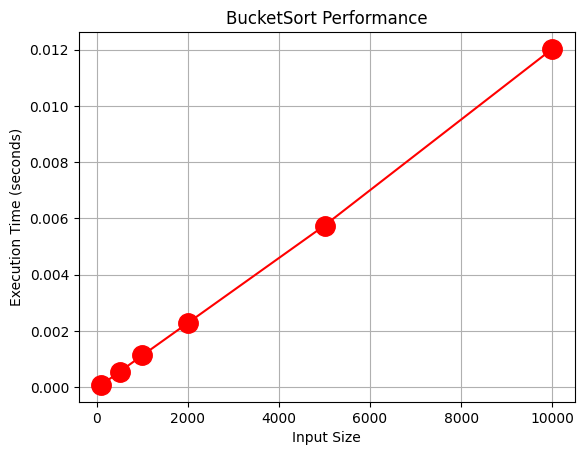

In [19]:
def rs_analyze_time(input_sizes):
    execution_times = []

    for size in input_sizes:
        arr = [random.randint(1, 100) for i in range(size)]

        start_time = time.perf_counter()
        radix_sort(arr)
        Compare[5] = len(arr)*10
        end_time = time.perf_counter()

        
        execution_times.append(end_time - start_time)
    Total_execution[5] = execution_times
    return execution_times

input_sizes = [100, 500, 1000, 2000, 5000,10000]
execution_times = rs_analyze_time(input_sizes)

plt.plot(input_sizes, execution_times, marker='o',color='r',markersize=14)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (seconds)')
plt.title('BucketSort Performance')
plt.grid(True)
plt.show()

In [64]:
print(Total_execution)

[[8.629998774267733e-05, 0.0005440999957500026, 0.0013444999931380153, 0.0030227999959606677, 0.010903100002906285, 0.03386520000640303], [0.00019239999528508633, 0.001110600001993589, 0.0025822000025073066, 0.005520499995327555, 0.014934899998479523, 0.031331399994087406], [0.00028279999969527125, 0.001631999999517575, 0.003537900003721006, 0.008175099996151403, 0.02285449999908451, 0.04713469999842346], [0.0, 0.004000663757324219, 0.020002365112304688, 0.08403182029724121, 0.5173580646514893, 2.0737690925598145], [9.57000011112541e-05, 0.0006715000054100528, 0.0004723999882116914, 0.0011402000091038644, 0.0034423000033712015, 0.005065499994088896], [8.019999950192869e-05, 0.0005479999963426962, 0.001128700008848682, 0.002282300003571436, 0.005745499991462566, 0.012021099988487549]]


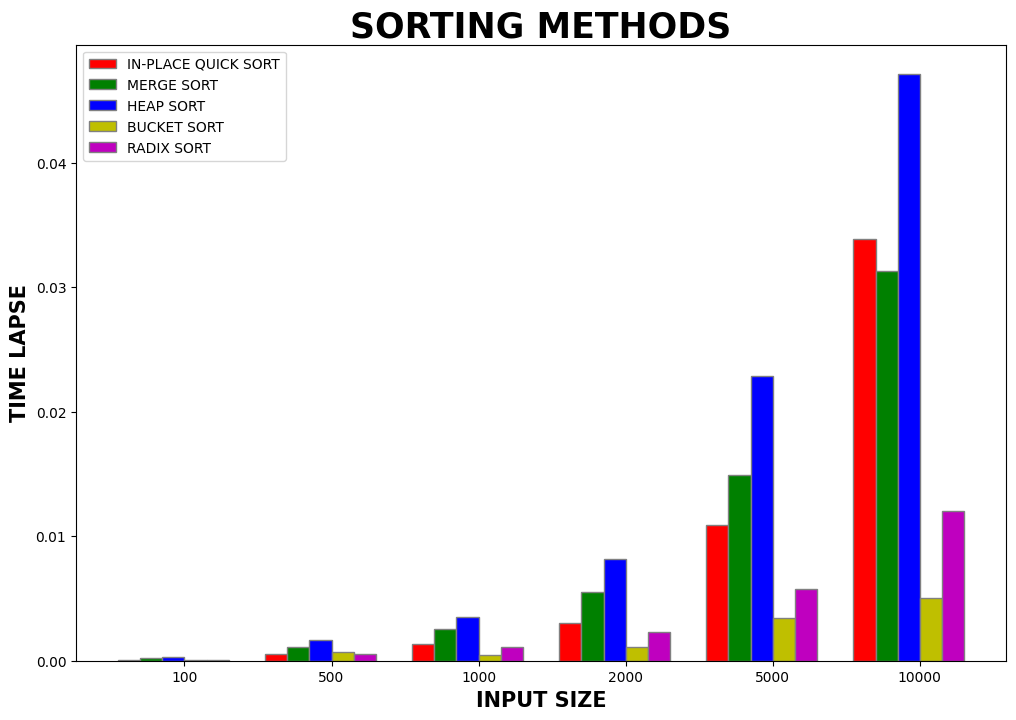

In [43]:
exe_time =  {100:Total_execution[0], 500:Total_execution[1], 1000:Total_execution[2],
             2000:Total_execution[3], 5000:Total_execution[4],10000:Total_execution[5]}

In [44]:
df = pd.DataFrame(exe_time)

In [53]:
df['Sorting Method'] = ['IN-PLACE QUICK SORT','MERGE SORT','HEAP SORT','INSERTION SORT','BUCKET SORT','RADIX SORT']

In [54]:
df = df[['Sorting Method'] + [col for col in df.columns if col != 'Sorting Method']]

In [62]:
df

,Sorting Method,100,500,1000,2000,5000,10000
0,IN-PLACE QUICK SORT,0.000086,0.000192,0.000283,0.000000,0.000096,0.000080
1,MERGE SORT,0.000544,0.001111,0.001632,0.004001,0.000672,0.000548
2,HEAP SORT,0.001344,0.002582,0.003538,0.020002,0.000472,0.001129
3,INSERTION SORT,0.003023,0.005520,0.008175,0.084032,0.001140,0.002282
4,BUCKET SORT,0.010903,0.014935,0.022854,0.517358,0.003442,0.005745
5,RADIX SORT,0.033865,0.031331,0.047135,2.073769,0.005065,0.012021


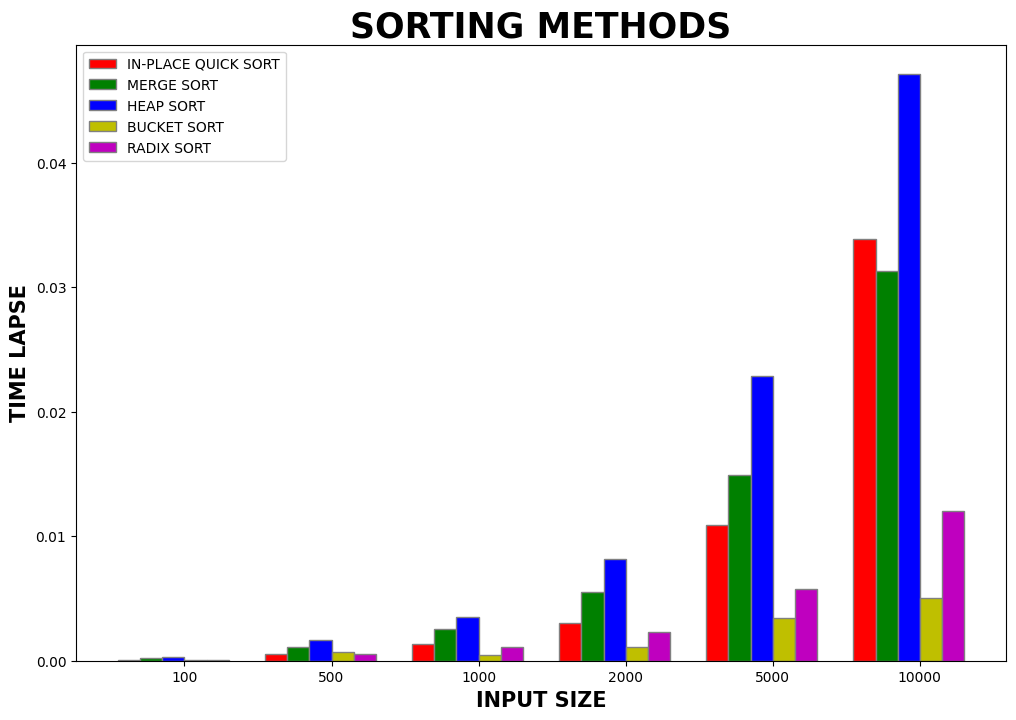

In [63]:
br1 = np.arange(len(Total_execution[0]))
barWidth = 0.15

# Adjust the x-positions for each set of bars to prevent overlapping
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

fig, ax = plt.subplots(figsize=(12, 8))

plt.bar(br1, Total_execution[0], color='r', width=barWidth, edgecolor='grey', label='IN-PLACE QUICK SORT')
plt.bar(br2, Total_execution[1], color='g', width=barWidth, edgecolor='grey', label='MERGE SORT')
plt.bar(br3, Total_execution[2], color='b', width=barWidth, edgecolor='grey', label='HEAP SORT')
plt.bar(br4, Total_execution[4], color='y', width=barWidth, edgecolor='grey', label='BUCKET SORT')
plt.bar(br5, Total_execution[5], color='m', width=barWidth, edgecolor='grey', label='RADIX SORT')

plt.title('SORTING METHODS', fontweight='bold', fontsize=25)
plt.xlabel('INPUT SIZE', fontweight='bold', fontsize=15)
plt.ylabel('TIME LAPSE', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth * 2.5 for r in range(len(Total_execution[0]))], [100, 500, 1000, 2000, 5000,10000])

plt.legend()
plt.show()





